In [1]:
#Import libraries
import pandas as pd
import nltk
import tweepy
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
import os
os.chdir('F:/Use Cases ML/SMA')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Importing twitter API credentials
%run ./keys_tweeter.ipynb

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
search_terms = 'spinal muscular atrophy '
#search_words = ["spinal muscular atrophy", "SMA", "#spinal muscular atrophy"]
lang = 'english'
date_since = "2021-02-01"
date_until = "2021-05-12"
tweets = []
likes = []
time = []
#cursor = tweepy.Cursor(api.search,q=search_terms,tweet_mode = "extended",since='2021-01-01', until='2021-05-10').items()
for i in tweepy.Cursor(api.search,q=search_terms,lang="en",tweet_mode = "extended",since=date_since,until=date_until).items():
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [5]:
df = pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})

In [6]:
#Removing retweets
df = df[~df.tweets.str.contains("RT")]
df=df.reset_index(drop=True)

In [7]:
df.head()

tweets  likes  \
0  #GEMIN5 #protein #complex #advances spurs #spi...      0   
1  MT @IRPatNIH: #NIH @NINDSnews research led by ...      0   
2  A new care pathway could save babies' lives by...      1   
3  Did you know that about 20% of people diagnose...      0   
4  Emily Holtvluwer, mother of two young children...      0   

                 time  
0 2021-05-11 14:19:01  
1 2021-05-11 14:03:02  
2 2021-05-11 14:00:01  
3 2021-05-11 13:00:09  
4 2021-05-11 09:01:04

In [8]:
df.to_csv('Tweets.csv',index=True)

In [9]:
mostlike = df.loc[df.likes.nlargest(10).index]

In [10]:
mostlike

tweets  likes  \
24  @RifatJawaid sir, Plz help @FightsSma this 3yr...     21   
18  @PragyaLive Plz help @FightsSma this 3yr old c...      5   
11  @jaavedjaaferi Sir, Plz help @FightsSma this 3...      4   
21  @sushant_says sir, please help save @FightsSma...      4   
28  @zoo_bear sir, Plz help @FightsSma this 3yr ol...      4   
9   @GauravPandhi Plz help @FightsSma this 3yr old...      3   
10  @sanket Plz help @FightsSma this 3yr old can't...      3   
12  @hankgreen I follow someone on YouTube who has...      3   
20  @salkhanacademy Hello Sir, we have a desperate...      2   
2   A new care pathway could save babies' lives by...      1   

                  time  
24 2021-05-10 18:31:12  
18 2021-05-10 21:02:03  
11 2021-05-11 01:16:56  
21 2021-05-10 20:05:57  
28 2021-05-10 18:24:12  
9  2021-05-11 04:52:13  
10 2021-05-11 04:48:55  
12 2021-05-11 01:00:46  
20 2021-05-10 20:32:55  
2  2021-05-11 14:00:01

In [11]:
list_of_sentences = [sentence for sentence in df.tweets]
lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [12]:
#Removing Punctuation
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]
lines2 = []
for word in lines:
    if word != '':
        lines2.append(word)

In [13]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [14]:
#Removing all Stop Words
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [15]:
df1 = pd.DataFrame(stem2)
df1 = df1[0].value_counts()

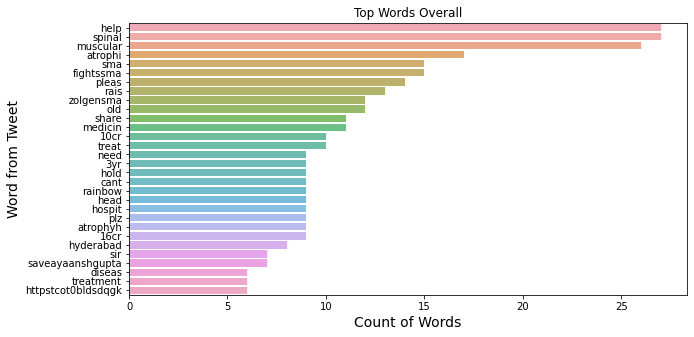

In [16]:
df1 = df1[:30,]
plt.figure(figsize=(10,5))
sns.barplot(df1.values, df1.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=14)
plt.xlabel('Count of Words', fontsize=14)
plt.show()

In [17]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [18]:
str1 = " " 
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word','Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

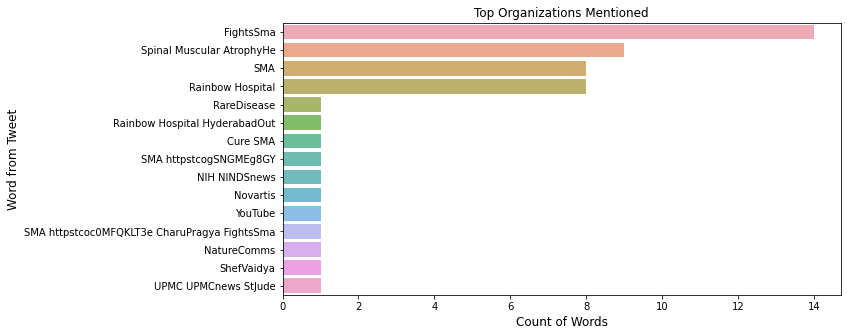

In [19]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [20]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

In [21]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()